In [32]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
## For running trial
import sys
sys.path.insert(1, '..\\network')
from trial import BGTrial
import nengo
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from nengo_extras.plot_spikes import (
    plot_spikes,
    preprocess_spikes,
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
run_num = 1
sals = [0.1,0.2,0.3,0.4,0.5,0.6]
n_ensembles=512
sp_dims=512
rands=[11]

## Generate Spike Data

In [20]:
bg = BGTrial()
for seed in rands:
    results = bg.run(saliences=sals,
                    run_num=run_num,
                    sp_dims=sp_dims,
                    version='new',
                    n_ensembles=n_ensembles,
                    n_neurons=int(200*(sp_dims/n_ensembles)),
                    relus_list=[],
                    neuron_type=nengo.neurons.LIF(),
                    plot=False, 
                    get_spikes=True,
                    verbose=False,
                    seed=seed,
                    data_format='npz',
                    data_dir='..\\data\\spikes',)

Build finished in 0:02:00.                                                      
Simulation finished in 0:03:51.                                                 


## Generate Spike Plots

In [73]:
allData=[]
## 3 actions
arr = np.load('..\\data\\spikes\\BGTrial#20240126-154554-f7c706e4.npz', allow_pickle=True)
## 6 actions
#arr = np.load('..\\data\\spikes\\BGTrial#20240126-165527-d14e9873.npz', allow_pickle=True)

vals=[]
header = arr.files
df = pd.DataFrame(header)

for item in arr.files:
    vals.append(arr[item])

allData.append(vals)

df = pd.DataFrame(allData, columns=header)

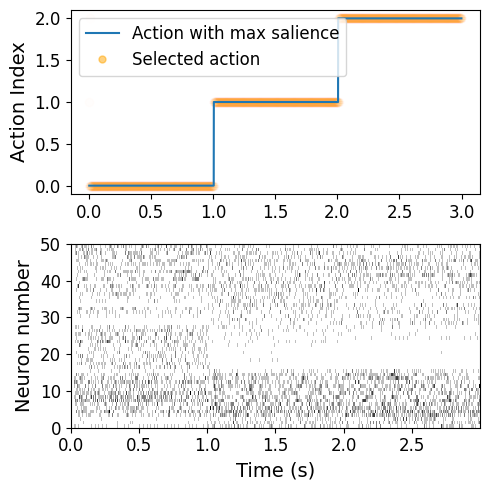

In [74]:
sals = df['saliences'][0]

fig,axs = plt.subplots(2,1,figsize=(5,5))

## Plot the chosen action against the desired action
axs[0].plot(np.arange(0, len(sals), 0.001), df['input_actions'][0].argmax(axis=1), label='Action with max salience')
axs[0].scatter(np.arange(0, len(sals), 0.001), df['decoded_actions'][0], alpha=0.01, color='orange', label='Selected action')
blue_line = mlines.Line2D([], [], color='#1f77b4', marker='None', linestyle='-',
                          markersize=10, label='Action with max salience')
orange_dot = mlines.Line2D([], [], color='orange', alpha=0.5, marker='.', linestyle='None',
                          markersize=10, label='Selected action')
axs[0].legend(handles=[blue_line,orange_dot], fontsize=12)
axs[0].set_ylabel("Action Index", fontsize=14)
axs[0].tick_params('both', labelsize=12)

## Plot the spikes
plot_spikes(*preprocess_spikes(np.arange(0, 3, 0.001), df['spikes'][0]), ax=axs[1])
axs[1].set_xlabel("Time (s)", fontsize = 14)
axs[1].set_ylabel("Neuron number", fontsize = 14)

axs[1].tick_params('both', labelsize=12)
fig.tight_layout()
#plt.show()

plt.savefig('.\\figs\\spikes_3actions.pdf')